# imports

In [1]:
import numpy as np
from individ import gp_individ
import pandas as pd
from population import gp_population
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px

# data_load

In [2]:
data = pd.read_excel("Mine_Dataset.xls", sheet_name='Normalized_Data')

In [3]:
data

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


In [4]:
data.loc[(data['M'] == 1),'M'] = 0
data.loc[(data['M'] > 1),'M'] = 1
data

,V,H,S,M
0,0.338157,0.000000,0.0,0
1,0.320241,0.181818,0.0,0
2,0.287009,0.272727,0.0,0
3,0.256284,0.454545,0.0,0
4,0.262840,0.545455,0.0,0
...,...,...,...,...
333,0.323262,0.909091,0.4,1
334,0.444108,0.181818,1.0,1
335,0.353474,0.454545,1.0,1
336,0.362537,0.727273,1.0,1


In [5]:
data = data.rename(columns={"M":"Class", })

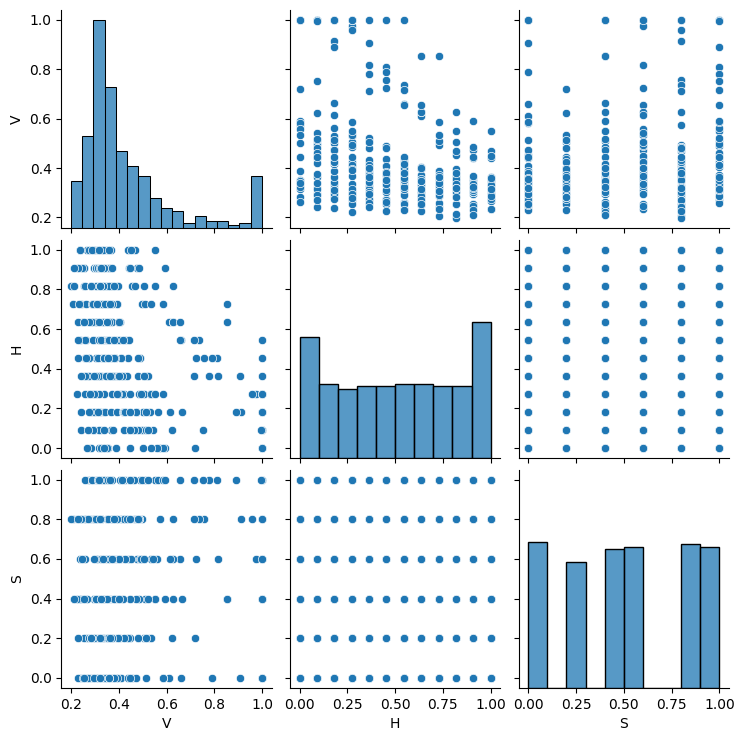

In [6]:
sns.pairplot(data[["V","H","S"]])
plt.show()

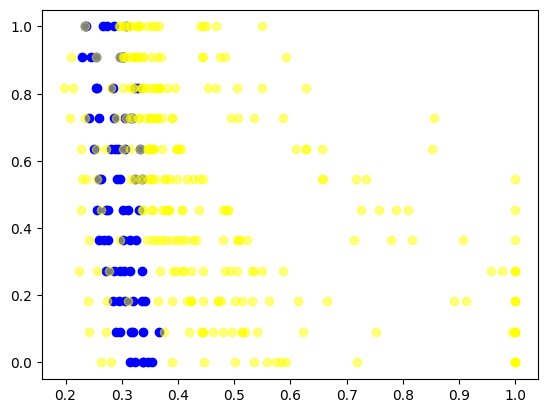

In [18]:
plt.scatter(data.loc[(data['Class'] == 0),'V'],data.loc[(data['Class'] == 0),'H'],color="blue")
plt.scatter(data.loc[(data['Class'] == 1),'V'],data.loc[(data['Class'] == 1),'H'],color="yellow", alpha=0.5)
plt.show()

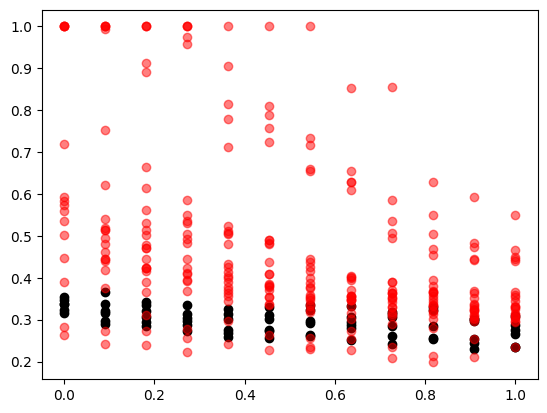

In [8]:
plt.scatter(data.loc[(data['Class'] == 0),'H'],data.loc[(data['Class'] == 0),'V'],color="black")
plt.scatter(data.loc[(data['Class'] == 1),'H'],data.loc[(data['Class'] == 1),'V'],color="red", alpha=0.5)
plt.show()

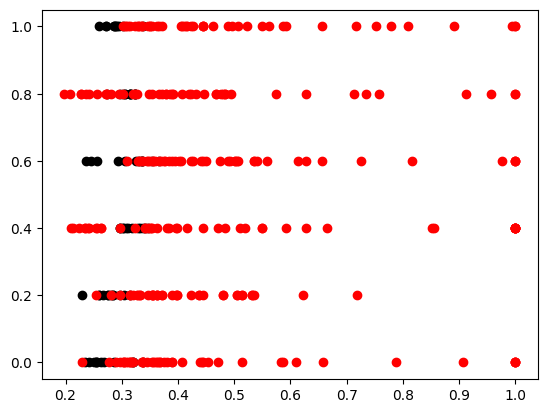

In [9]:
plt.scatter(data.loc[(data['Class'] == 0),'V'],data.loc[(data['Class'] == 0),'S'],color="black")
plt.scatter(data.loc[(data['Class'] == 1),'V'],data.loc[(data['Class'] == 1),'S'],color="red")
plt.show()

In [7]:
data = data.rename(columns={"H":"Y", })

In [8]:
data

,V,Y,S,Class
0,0.338157,0.000000,0.0,0
1,0.320241,0.181818,0.0,0
2,0.287009,0.272727,0.0,0
3,0.256284,0.454545,0.0,0
4,0.262840,0.545455,0.0,0
...,...,...,...,...
333,0.323262,0.909091,0.4,1
334,0.444108,0.181818,1.0,1
335,0.353474,0.454545,1.0,1
336,0.362537,0.727273,1.0,1


In [8]:
# Предположим, что последний столбец - это метки классов
X = data.iloc[:, :-1]  # Все столбцы, кроме последнего
y = data.iloc[:, -1]   # Последний столбец

# Добавляем метки классов в DataFrame
data['Class'] = y

# Построение интерактивного 3D графика
fig = px.scatter_3d(data, x=X.iloc[:, 0], y=X.iloc[:, 1], z=X.iloc[:, 2], color='Class',
                    title='3D Land Mines Dataset Visualization',
                    labels={'x': 'Напряжение', 'y': 'Высота', 'z': 'Тип почвы'}, )

# Увеличение размера графика
fig.update_layout(width=1000, height=800)

# Отображение графика
fig.show()

In [9]:
numerical_names = ["V","S"]

In [11]:
true_class = np.array(data['Class'])
y_train = np.array( data['Y'] )
size = len(y_train)
train = []
for column in numerical_names:
    train.append( np.reshape( data[column].to_numpy() , (size,1) ) )
X_train = np.array(train[0])
X_train = np.append( X_train, train[1], axis=1 )


100%|██████████| 20/20 [00:09<00:00,  2.22it/s]

Значение фитнесса: 0.90234375


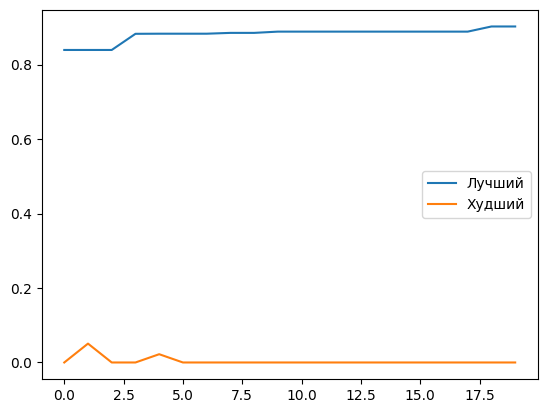

Достигнутая точность: 0.8520710059171598
Done!


In [41]:
model = gp_population(X_train, y_train, true_class, 2, generations_count=20, mutation_probability=0.5, selection_type='tournament',depth=5, tournament_size = 15)
model.fit()
model.best_individ_of_generation[0][0].draw_tree()

rule = model.final_rule
if len(rule) == 1:
    rule = np.ones(len(X_train)) * rule

data['predicted_class'] = model.final_labels
data['predicted_rule'] = rule



plt.plot(model.history[:,0], label='Лучший')
plt.plot(model.history[:,1], label='Худший')
plt.legend()
plt.show()


print(f"Достигнутая точность: {accuracy_score(model.final_labels, true_class)}")
print('Done!')

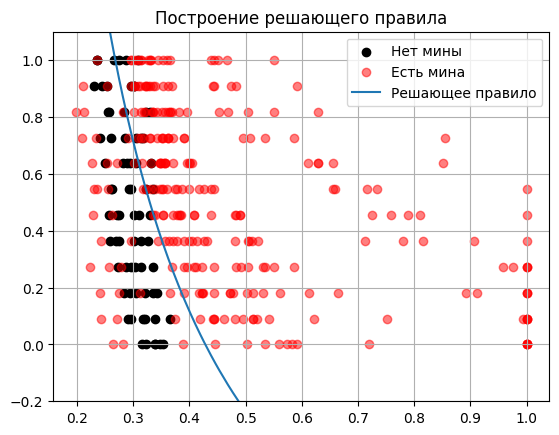

In [42]:
data_for_pics = data.sort_values(by=['V'])
plt.title("Построение решающего правила")
plt.grid()
plt.scatter(data_for_pics.loc[(data_for_pics['Class'] == 0),'V'],data_for_pics.loc[(data_for_pics['Class'] == 0),'Y'],color="black", label="Нет мины")
plt.scatter(data_for_pics.loc[(data_for_pics['Class'] == 1),'V'],data_for_pics.loc[(data_for_pics['Class'] == 1),'Y'],color="red", alpha=0.5, label="Есть мина")
plt.plot( data_for_pics["V"], data_for_pics['predicted_rule'], label="Решающее правило")
plt.legend()
plt.ylim(-0.2,1.1)
plt.show()

In [24]:
import sympy

In [43]:
expr = model.best_individ_of_generation[0][0].head.get_formula()
expr = sympy.sympify(expr)
expr

-1.76243109283859 + 0.731727/sin(x_0)

100%|██████████| 40/40 [01:13<00:00,  1.84s/it]


Значение фитнесса: 0.8877721943048577


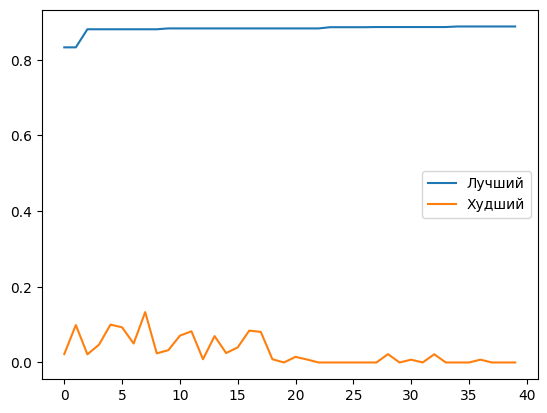

Достигнутая точность: 0.8017751479289941
Done!


In [12]:
model = gp_population(X_train, y_train, true_class, 2, generations_count=40, mutation_probability=0.5, selection_type='tournament',depth=8, tournament_size = 10)
model.fit()
model.best_individ_of_generation[0][0].draw_tree()

rule = model.final_rule
if len(rule) == 1:
    rule = np.ones(len(X_train)) * rule

data['predicted_class'] = model.final_labels
data['predicted_rule'] = rule



plt.plot(model.history[:,0], label='Лучший')
plt.plot(model.history[:,1], label='Худший')
plt.legend()
plt.show()


print(f"Достигнутая точность: {accuracy_score(model.final_labels, true_class)}")
print('Done!')

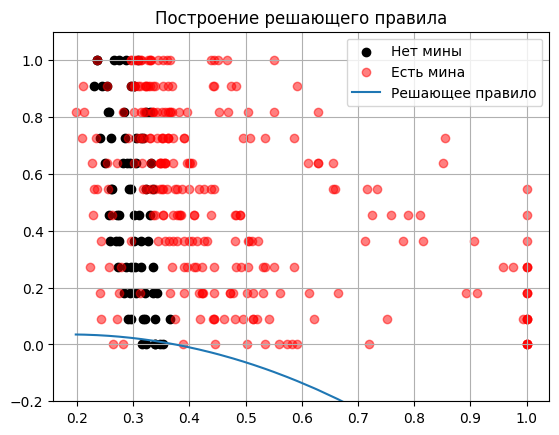

In [13]:
data_for_pics = data.sort_values(by=['V'])
plt.title("Построение решающего правила")
plt.grid()
plt.scatter(data_for_pics.loc[(data_for_pics['Class'] == 0),'V'],data_for_pics.loc[(data_for_pics['Class'] == 0),'Y'],color="black", label="Нет мины")
plt.scatter(data_for_pics.loc[(data_for_pics['Class'] == 1),'V'],data_for_pics.loc[(data_for_pics['Class'] == 1),'Y'],color="red", alpha=0.5, label="Есть мина")
plt.plot( data_for_pics["V"], data_for_pics['predicted_rule'], label="Решающее правило")
plt.legend()
plt.ylim(-0.2,1.1)
plt.show()